In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv("/content/Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
education_counts = df['Education'].value_counts()
education_counts


Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

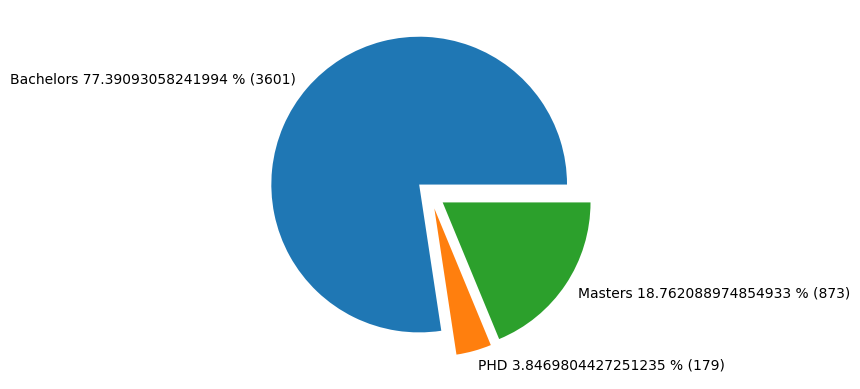

In [7]:
l,a=list(set(df["Education"])),[]
for i in range(len(l)):
    a.append(list(df["Education"]).count(l[i]))
    l[i]=l[i]+ " "+ str(list(df["Education"]).count(l[i])*100/len(df["Education"]))+ " % (" +str(list(df["Education"]).count(l[i]))+ ")"
explode = (0.1, 0.1, 0.1)
plt.pie(a,labels=l, explode=explode)
plt.show()


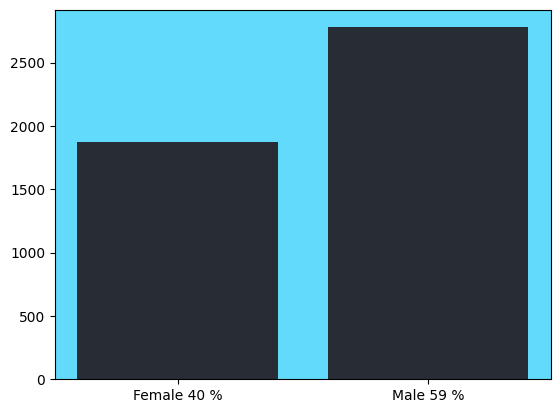

In [9]:
l,a=list(set(df["Gender"])),[]
for i in range(len(l)):
    a.append(list(df["Gender"]).count(l[i]))
    l[i]=l[i]+ " "+ str(int(list(df["Gender"]).count(l[i])*100/len(df["Gender"])))+" %"
plt.bar(l,a, color='#282c34', fill=True)
ax=plt.gca()
ax.set_facecolor('#61dafb')
plt.show()

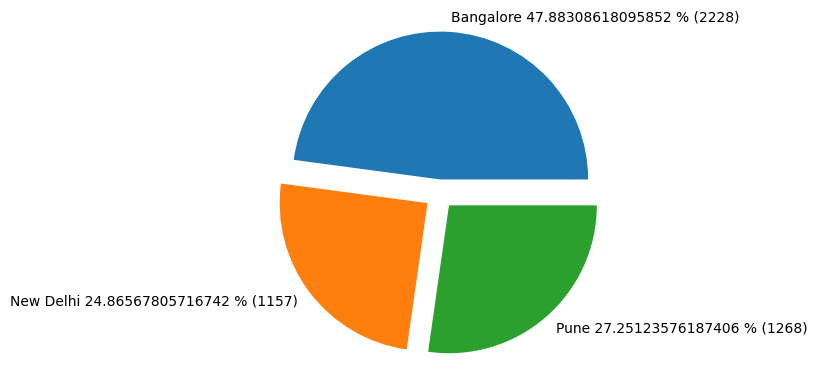

In [11]:
l,a=list(set(df["City"])),[]
for i in range(len(l)):
    a.append(list(df["City"]).count(l[i]))
    l[i]=l[i]+ " "+ str(list(df["City"]).count(l[i])*100/len(df["City"]))+ " % (" +str(list(df["City"]).count(l[i]))+ ")"
explode = (0.1, 0.1, 0.1)
plt.pie(a,labels=l, explode=explode)
plt.show()

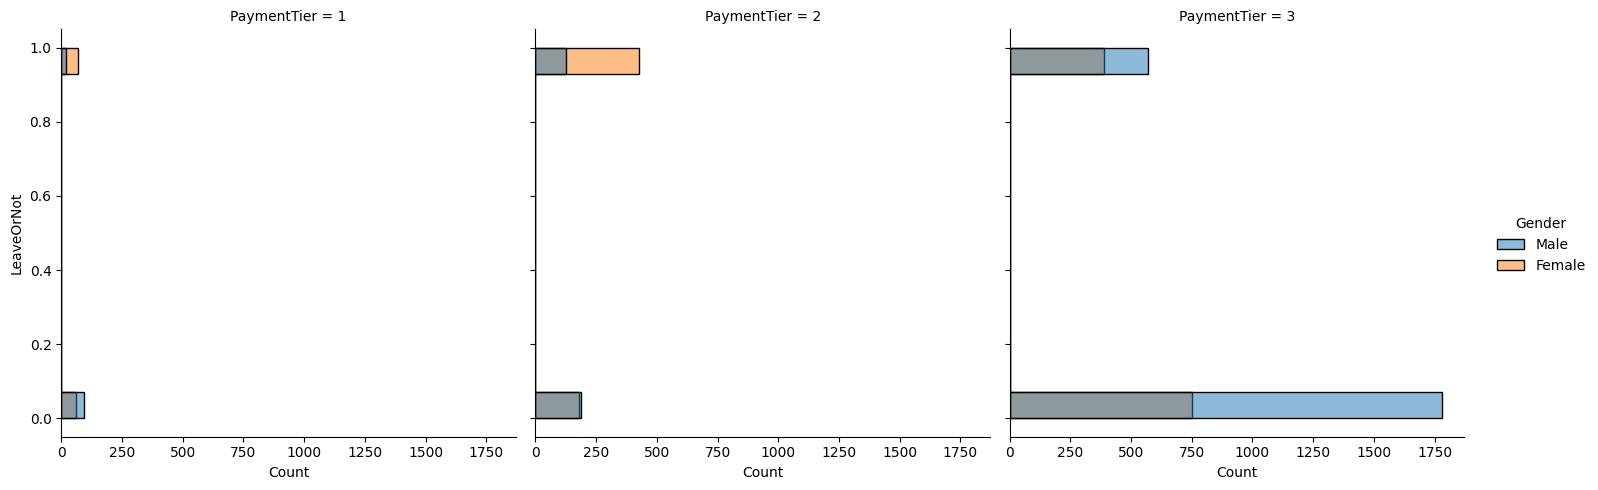

In [13]:
sns.displot(data=df, y="LeaveOrNot", legend=True, hue="Gender",col="PaymentTier")


In [14]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(dtype=np.int64)

x = df.drop("LeaveOrNot",axis=1)
y = df["LeaveOrNot"]

x[x.columns.to_list()] = encoder.fit_transform(x)
x.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,5,0,2,12,1,0,0
1,0,1,2,0,6,0,0,3
2,0,2,1,2,16,0,0,2
3,1,4,0,2,5,1,0,5
4,1,5,2,2,2,1,1,2


In [21]:
from sklearn.linear_model import LogisticRegression,SGDClassifier,ElasticNet
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,HistGradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm  import LGBMClassifier

from sklearn.model_selection import cross_val_score

In [22]:
lr = LogisticRegression()
sgd = SGDClassifier()
gb = GradientBoostingClassifier()
adb = AdaBoostClassifier()
svc = SVC()

# define dict of models
clfs={
    "Logistic":lr,
    "SVC":svc,
    "Stocastic Grad":sgd,
    "Grad boost":gb,
    "AdaBoost":adb
}

In [23]:
perf = {}

for name,model in zip(clfs, clfs.values()):
    print(f"Training {name}")
    tmp = cross_val_score(model, X=x, y =y,cv=10,n_jobs=-1, scoring="precision")
    print(f"{name} got average of {tmp.mean()} and {tmp.std()}")
    perf[name] =  tmp

model = []
value = []
std = []
for name,arr in zip(perf, perf.values()):
    model.append(name)
    value.append(np.round(arr.mean()*100,2))
    std.append(np.round(arr.std()*100,2))

perf_df = pd.DataFrame({"model":model, "mean":value, "std dev":std})
display(perf_df.sort_values("mean", ascending=False))

Training Logistic
Logistic got average of 0.6265297880572614 and 0.03875821200184556
Training SVC
SVC got average of 0.7698557791133978 and 0.06055759947259514
Training Stocastic Grad
Stocastic Grad got average of 0.5782705254626059 and 0.1360761533109085
Training Grad boost
Grad boost got average of 0.866994583915314 and 0.04315488001554758
Training AdaBoost
AdaBoost got average of 0.8076953705919669 and 0.048878661068300314


,model,mean,std dev
3,Grad boost,86.70,4.32
4,AdaBoost,80.77,4.89
1,SVC,76.99,6.06
0,Logistic,62.65,3.88
2,Stocastic Grad,57.83,13.61
